# Introduction

The notebook is intended to predict the chance failure of a specific product code given its attributes and measurements.

This is the [dataset used](https://www.kaggle.com/competitions/tabular-playground-series-aug-2022).

In [15]:
# Import Standard Libraries
import pandas as pd
import numpy as np

import plotly.express as ex
from plotly.io import read_json

# Read Data

In [2]:
# Read train & test data
train_data = pd.read_csv('./../../data/2022_08/train.csv')
test_data = pd.read_csv('./../../data/2022_08/test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [4]:
train_data.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


# Exploratory Data Analysis

## id

In [5]:
# Check for duplicates
print('ID duplicates: {}'.format(len(train_data[train_data['id'].duplicated()])))

ID duplicates: 0


## Product Code

In [6]:
# Check for NaN values
print('Product Code NaN values: {}'.format(len(train_data[train_data['product_code'].isna()])))

Product Code NaN values: 0


In [13]:
# Plot the Histogram of 'product_code' Distribution
figure = ex.histogram(train_data, 
                      x='product_code', 
                      title='Product Code Distribution', 
                      labels={'product_code':'Product Code',
                              'count': 'Share'},
                      height=500,
                      histnorm='',
                      template='plotly_dark')

figure.update_layout(yaxis_title='Share', 
                     font=dict(family="PT Sans", 
                               size=14), 
                     title_font=dict(family="PT Sans",
                                     size=30), 
                     title_x=0.7)

# Save figure
figure.write_json("./plots/product_code_distribution.json")

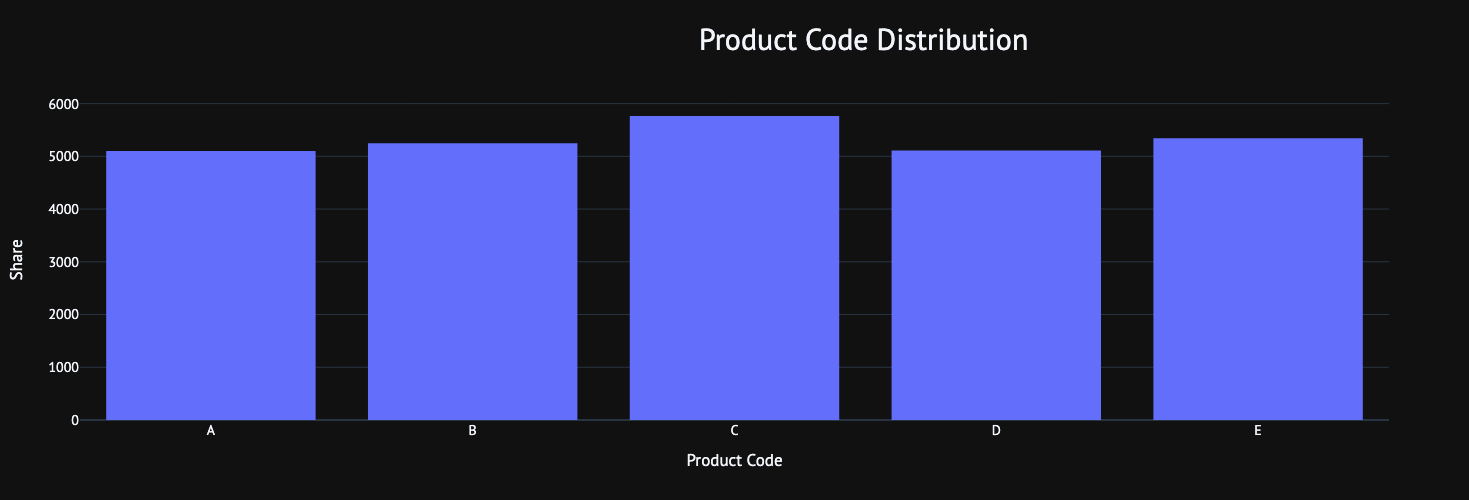

In [17]:
read_json('./plots/product_code_distribution.json').show()